In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

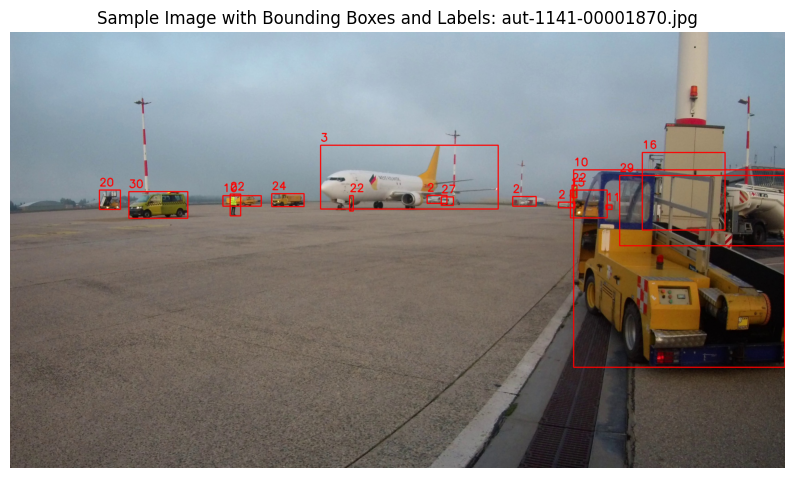

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset directory
dataset_dir = "/kaggle/input/airportvehicledataset"

# Paths to images and bboxes directories
images_dir = os.path.join(dataset_dir, "images")
bboxes_dir = os.path.join(dataset_dir, "bboxes")

# Get a list of image files (assuming images are in common formats like jpg/png)
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Take the first image as a sample
sample_image_name = image_files[0]
sample_image_path = os.path.join(images_dir, sample_image_name)

# Corresponding bboxes CSV file (assuming filename matches, e.g., aut-1141-00001870.jpg -> aut-1141-00001870.csv)
bbox_file_name = sample_image_name.replace('.jpg', '.csv').replace('.jpeg', '.csv').replace('.png', '.csv')
bbox_file_path = os.path.join(bboxes_dir, bbox_file_name)

# Read the image
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

# Read the bounding box data from CSV
bbox_df = pd.read_csv(bbox_file_path)
# Draw rectangles and add labels based on tlx, tly, brx, bry
for index, row in bbox_df.iterrows():
    x_min, y_min = int(row['tlx']), int(row['tly'])
    x_max, y_max = int(row['brx']), int(row['bry'])
    label = str(row['label'])  # Convert label to string for display
    # Draw rectangle on the image
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # Blue color for bounding boxes
    # Add label text
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title(f"Sample Image with Bounding Boxes and Labels: {sample_image_name}")
plt.axis('off')
plt.show()

# Plot Number of Classes 

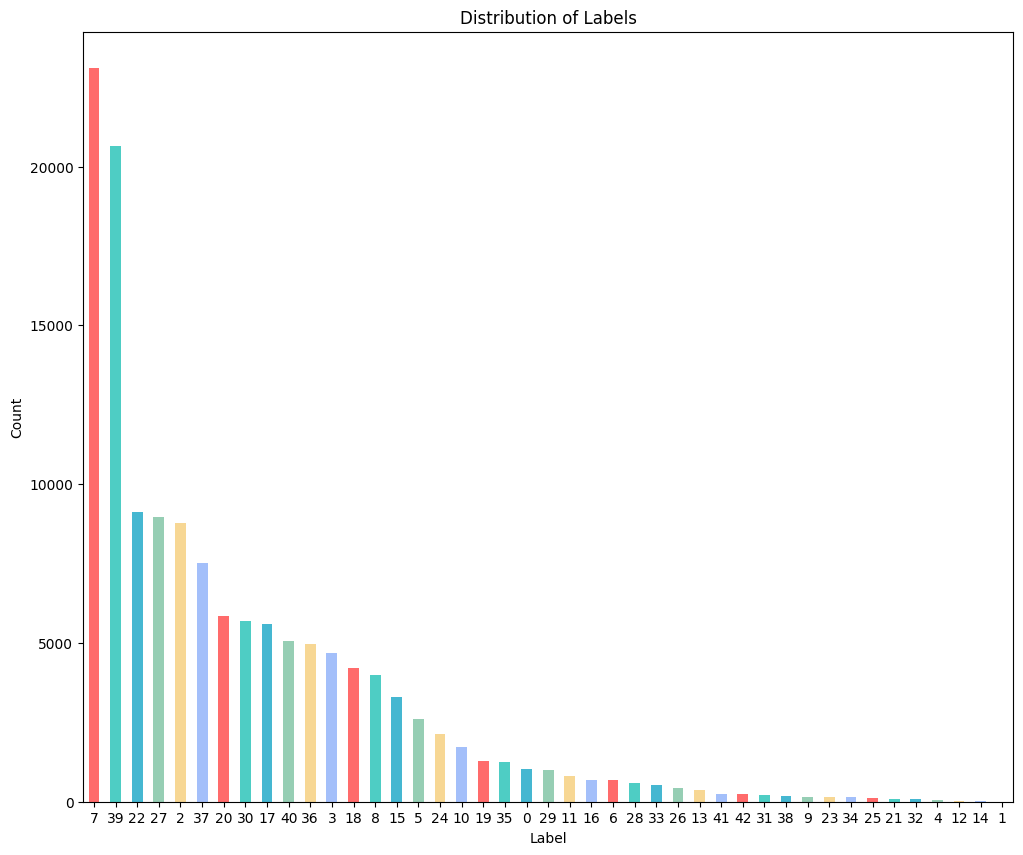

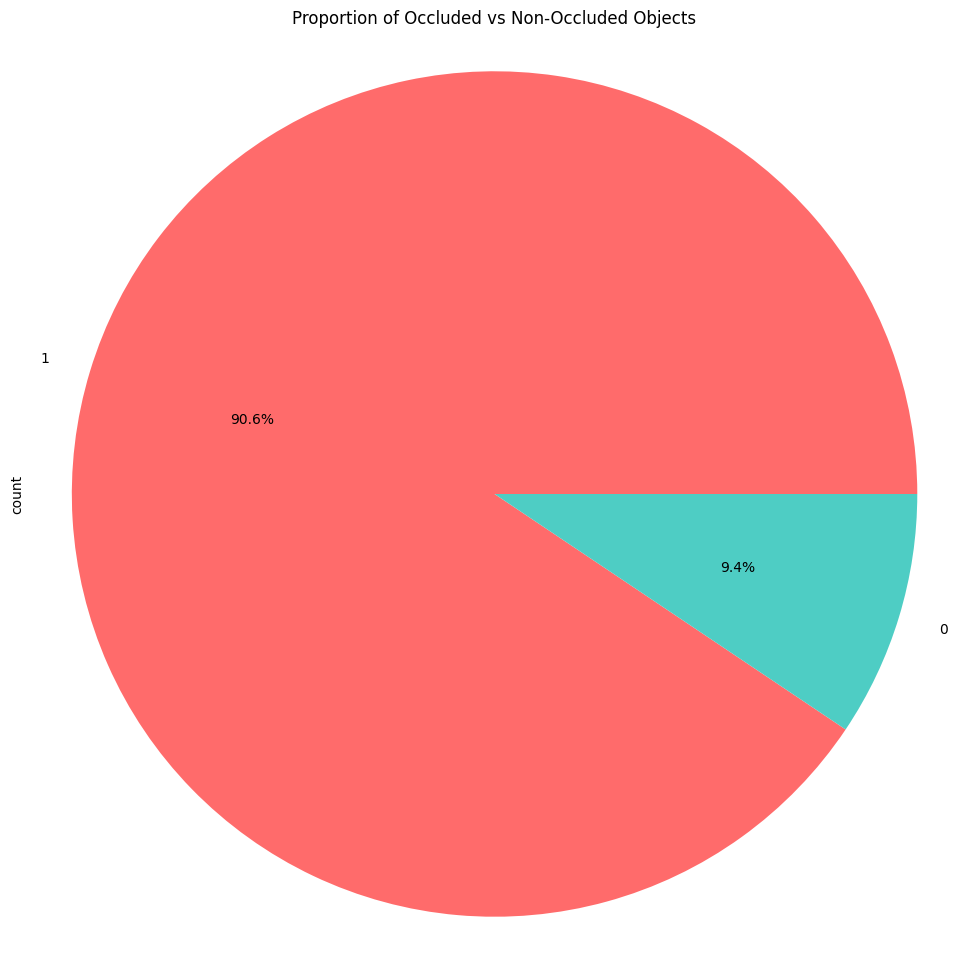

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset directory
dataset_dir = "/kaggle/input/airportvehicledataset"
bboxes_dir = os.path.join(dataset_dir, "bboxes")

# List to store all bounding box data
all_data = []

# Load all CSV files in the bboxes directory
for csv_file in os.listdir(bboxes_dir):
    if csv_file.endswith('.csv'):
        csv_path = os.path.join(bboxes_dir, csv_file)
        df = pd.read_csv(csv_path)
        all_data.append(df)

# Concatenate all data into a single DataFrame
if all_data:
    bbox_df = pd.concat(all_data, ignore_index=True)
else:
    raise ValueError("No CSV files found in the bboxes directory.")

# Chart 1: Distribution of Labels
plt.figure(figsize=(12, 10))
bbox_df['label'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#F7D794', '#A3BFFA'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Chart 2: Occlusion Status
plt.figure(figsize=(12, 12))
bbox_df['occluded'].value_counts().plot(kind='pie', colors=['#FF6B6B', '#4ECDC4'], autopct='%1.1f%%')
plt.title('Proportion of Occluded vs Non-Occluded Objects')
plt.axis('equal')
plt.show()

# EDA Analysis
### 1: Distribution of Labels
### 2: Occlusion Status
### 3: Number of Classes
### 4: Number of Images with Labels
### 5: Number of Objects per Class with Images

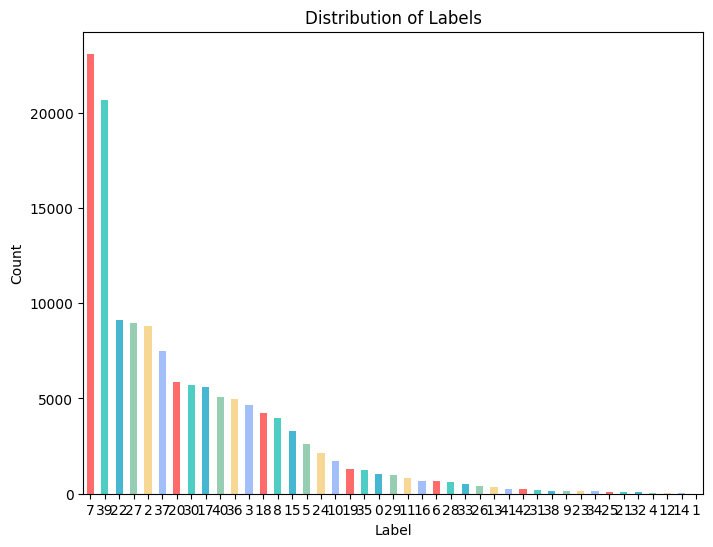

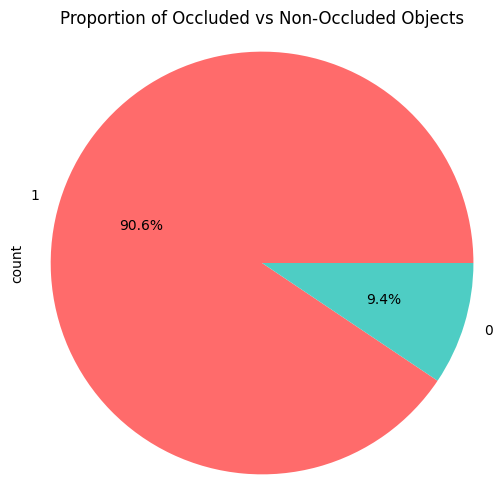

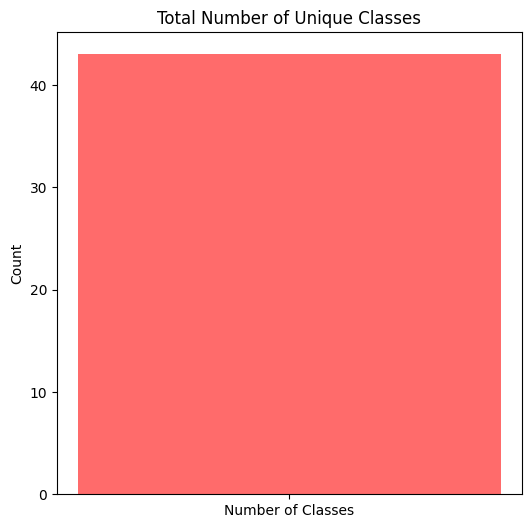

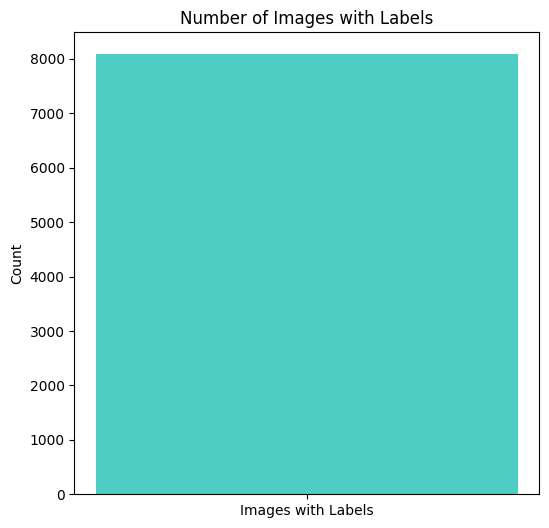

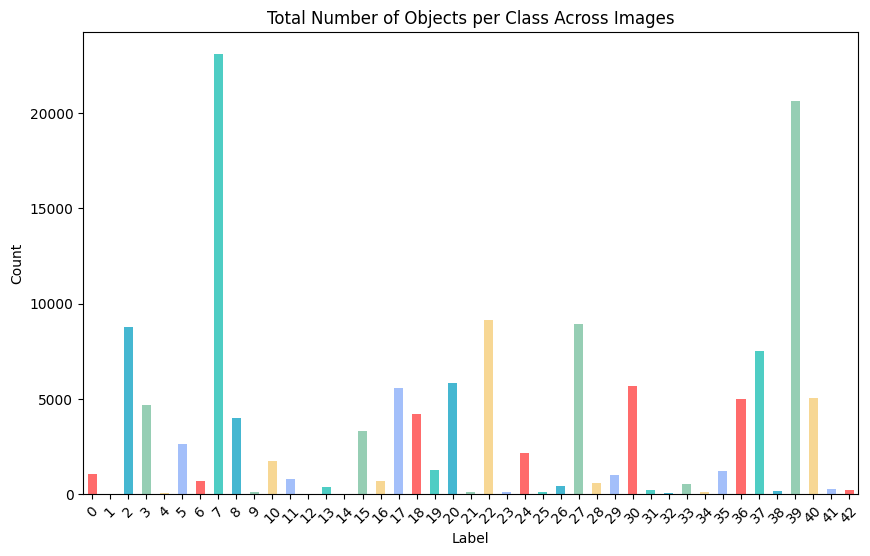

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset directory
dataset_dir = "/kaggle/input/airportvehicledataset"
bboxes_dir = os.path.join(dataset_dir, "bboxes")

# List to store all bounding box data and image filenames
all_data = []
image_files = set()

# Load all CSV files in the bboxes directory
for csv_file in os.listdir(bboxes_dir):
    if csv_file.endswith('.csv'):
        csv_path = os.path.join(bboxes_dir, csv_file)
        df = pd.read_csv(csv_path)
        # Extract image filename from CSV filename (removing .csv extension)
        image_name = csv_file.replace('.csv', '')
        image_files.add(image_name)
        df['image_name'] = image_name  # Add image name as a column
        all_data.append(df)

# Concatenate all data into a single DataFrame
if all_data:
    bbox_df = pd.concat(all_data, ignore_index=True)
else:
    raise ValueError("No CSV files found in the bboxes directory.")

# Chart 1: Distribution of Labels
plt.figure(figsize=(8, 6))
bbox_df['label'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#F7D794', '#A3BFFA'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Chart 2: Occlusion Status
plt.figure(figsize=(6, 6))
bbox_df['occluded'].value_counts().plot(kind='pie', colors=['#FF6B6B', '#4ECDC4'], autopct='%1.1f%%')
plt.title('Proportion of Occluded vs Non-Occluded Objects')
plt.axis('equal')
plt.show()

# Chart 3: Number of Classes
num_classes = bbox_df['label'].nunique()
plt.figure(figsize=(6, 6))
plt.bar(['Number of Classes'], [num_classes], color='#FF6B6B')
plt.title('Total Number of Unique Classes')
plt.ylabel('Count')
plt.show()

# Chart 4: Number of Images with Labels
num_images_with_labels = len(image_files)
plt.figure(figsize=(6, 6))
plt.bar(['Images with Labels'], [num_images_with_labels], color='#4ECDC4')
plt.title('Number of Images with Labels')
plt.ylabel('Count')
plt.show()

# Chart 5: Number of Objects per Class with Images
objects_per_class = bbox_df.groupby(['image_name', 'label']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
objects_per_class.sum().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#F7D794', '#A3BFFA'])
plt.title('Total Number of Objects per Class Across Images')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Class distribution

In [6]:
# Verify class distribution
print("Verifying class distribution:")
class_counts = {}
csv_files = [f for f in os.listdir(bboxes_dir) if f.endswith('.csv')]
for csv_file in csv_files:
    csv_path = os.path.join(bboxes_dir, csv_file)
    image_file = csv_file.replace('.csv', '.jpg')
    image_path = os.path.join(images_dir, image_file)
    if os.path.exists(image_path):
        df = pd.read_csv(csv_path)
        labels = df['label'].unique()
        for label in labels:
            label_str = str(label)
            class_counts[label_str] = class_counts.get(label_str, 0) + 1
print("Number of images per class:")
for label, count in sorted(class_counts.items()):
    print(f"Class {label}: {count} images")
print(f"Total images: {len([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])}")

# Proceed with create_tf_records
create_tf_records(images_dir, bboxes_dir, train_record_path)

Verifying class distribution:
Number of images per class:
Class 0: 976 images
Class 1: 2 images
Class 10: 1278 images
Class 11: 772 images
Class 12: 23 images
Class 13: 313 images
Class 14: 17 images
Class 15: 2785 images
Class 16: 670 images
Class 17: 3364 images
Class 18: 2073 images
Class 19: 928 images
Class 2: 4081 images
Class 20: 3588 images
Class 21: 88 images
Class 22: 2927 images
Class 23: 131 images
Class 24: 1929 images
Class 25: 106 images
Class 26: 404 images
Class 27: 4453 images
Class 28: 484 images
Class 29: 973 images
Class 3: 3937 images
Class 30: 3164 images
Class 31: 184 images
Class 32: 80 images
Class 33: 148 images
Class 34: 73 images
Class 35: 466 images
Class 36: 1304 images
Class 37: 2920 images
Class 38: 161 images
Class 39: 4988 images
Class 4: 18 images
Class 40: 3508 images
Class 41: 221 images
Class 42: 171 images
Class 5: 1590 images
Class 6: 291 images
Class 7: 4772 images
Class 8: 2711 images
Class 9: 68 images
Total images: 8084


NameError: name 'create_tf_records' is not defined

# MobileNet SSD

In [ ]:
# Clone and patch TensorFlow Object Detection API before installation
!git clone https://github.com/tensorflow/models.git
%cd models/research

# Patch freezable_sync_batch_norm.py before installation
!sed -i 's/class FreezableSyncBatchNorm(tf.keras.layers.experimental.SyncBatchNormalization):/class FreezableSyncBatchNorm(tf.keras.layers.BatchNormalization):\n    def __init__(self, *args, **kwargs):\n        super(FreezableSyncBatchNorm, self).__init__(*args, **kwargs)\n        self._is_freezed = False\n\n    def freeze(self):\n        self._is_freezed = True\n        self.trainable = False\n\n    def unfreeze(self):\n        self._is_freezed = False\n        self.trainable = True/' object_detection/core/freezable_sync_batch_norm.py

# Compile protos and install the patched package
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

# Import libraries
import os
import pandas as pd
import tensorflow as tf
from object_detection.utils import dataset_util
from object_detection.builders import model_builder
from object_detection.utils import config_util
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import contextlib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set paths
dataset_dir = "/kaggle/input/airportvehicledataset"  # Adjust if your dataset path differs
bboxes_dir = os.path.join(dataset_dir, "bboxes")
images_dir = os.path.join(dataset_dir, "images")
working_dir = "/kaggle/working/models/mbssd"
pipeline_config_path = os.path.join(working_dir, "pipeline.config")
checkpoint_dir = os.path.join(working_dir, "checkpoint")
output_dir = os.path.join(working_dir, "output")
label_map_path = os.path.join(working_dir, "label_map.pbtxt")
train_record_path = os.path.join(dataset_dir, "train.record")
test_record_path = os.path.join(dataset_dir, "test.record")

# Create necessary directories
os.makedirs(working_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Step 1: Create Label Map
def create_label_map(labels):
    with open(label_map_path, 'w') as f:
        for idx, label in enumerate(sorted(labels), 1):
            f.write('item {\n  id: %d\n  name: "%s"\n}\n' % (idx, label))

unique_labels = sorted(pd.concat([pd.read_csv(os.path.join(bboxes_dir, f))['label'] for f in os.listdir(bboxes_dir) if f.endswith('.csv')]).unique())
create_label_map([str(l) for l in unique_labels])

# Step 2: Create TFRecord Function
def create_tf_example(image_path, csv_path):
    with tf.io.gfile.GFile(image_path, 'rb') as fid:
        encoded_image = fid.read()
    df = pd.read_csv(csv_path)
    filename = os.path.basename(image_path).encode('utf8')
    image_format = b'jpg'
    image = tf.io.decode_image(encoded_image)
    height = image.shape[0]
    width = image.shape[1]
    xmins = df['tlx'].values / width
    xmaxs = df['brx'].values / width
    ymins = df['tly'].values / height
    ymaxs = df['bry'].values / height
    classes_text = [str(l).encode('utf8') for l in df['label'].values]
    classes = [int(l) for l in df['label'].values]

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins.tolist()),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs.tolist()),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins.tolist()),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs.tolist()),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

# Step 3: Generate TFRecords
def create_tf_records(image_dir, bboxes_dir, output_path, split_ratio=0.8):
    writer = tf.io.TFRecordWriter(output_path)
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        csv_file = image_file.replace('.jpg', '.csv').replace('.jpeg', '.csv').replace('.png', '.csv')
        csv_path = os.path.join(bboxes_dir, csv_file)
        if os.path.exists(csv_path):
            tf_example = create_tf_example(image_path, csv_path)
            writer.write(tf_example.SerializeToString())
    writer.close()

    if output_path == train_record_path:
        total_images = len(image_files)
        test_images = int((1 - split_ratio) * total_images)
        test_writer = tf.io.TFRecordWriter(test_record_path)
        with open(output_path, 'rb') as f:
            records = [r for r in tf.data.TFRecordDataset(output_path)]
            for r in records[-test_images:]:
                test_writer.write(r.numpy())
            with open(output_path, 'wb') as f_train:
                for r in records[:-test_images]:
                    f_train.write(r.numpy())
        test_writer.close()

create_tf_records(images_dir, bboxes_dir, train_record_path)

# Step 4: Download and Prepare Pre-trained Model
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!mv ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint {checkpoint_dir}

# Step 5: Configure pipeline.config
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_320x320_coco17_tpu-8.config -O {pipeline_config_path}
with open(pipeline_config_path, 'r') as f:
    config = f.read()
config = config.replace('path/to/train.record', train_record_path)
config = config.replace('path/to/val.record', test_record_path)
config = config.replace('path/to/label_map.pbtxt', label_map_path)
config = config.replace('num_classes: 90', f'num_classes: {len(unique_labels)}')
config = config.replace('fine_tune_checkpoint: "path/to/checkpoint/ckpt-0"', f'fine_tune_checkpoint: "{os.path.join(checkpoint_dir, "ckpt-0")}"')
with open(pipeline_config_path, 'w') as f:
    f.write(config)

# Step 6: Train the Model
!python /kaggle/working/models/research/object_detection/model_main_tf2.py \
    --model_dir={output_dir} \
    --pipeline_config_path={pipeline_config_path} \
    --num_train_steps=1000

# Step 7: Evaluate and Generate Metrics
def evaluate_model():
    configs = config_util.get_configs_from_pipeline_file(pipeline_config_path)
    model_config = configs['model']
    detection_model = model_builder.build(model_config=model_config, is_training=False)
    ckpt = tf.train.Checkpoint(model=detection_model)
    ckpt.restore(os.path.join(output_dir, 'ckpt-0')).expect_partial()
    dataset = tf.data.TFRecordDataset(test_record_path)
    category_index = label_map_util.create_category_index_from_labelmap(label_map_path)
    true_labels = []
    pred_labels = []
    for raw_record in dataset.take(100):
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        image = dataset_util.restore_image_from_example(example)
        input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.uint8)
        detections = detection_model(input_tensor)
        classes = detections['detection_classes'][0].numpy().astype(np.int32)
        scores = detections['detection_scores'][0].numpy()
        true_labels.extend([int(example.features.feature['image/object/class/label'].int64_list.value[0])] * len(classes))
        pred_labels.extend(classes[scores > 0.5])
    cm = confusion_matrix(true_labels, pred_labels, labels=range(len(unique_labels)))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(l) for l in unique_labels], yticklabels=[str(l) for l in unique_labels])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    report = classification_report(true_labels, pred_labels, labels=range(len(unique_labels)), target_names=[str(l) for l in unique_labels], zero_division=0)
    print("Classification Report:\n", report)

evaluate_model()

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Should print 2.15.0